In [20]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate
from scipy.fft import fftshift
 

# Question 1

[0.785]


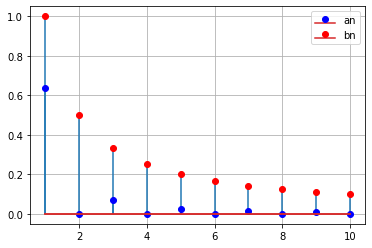

In [10]:
n=np.arange(1,11,1)
lf=3.14
li=-3.14
l = (lf-li)/2 
a_0=[integrate.quad(lambda x :((3.14/2-x/2)/l),0,3.14)[0] ] #using scipy quard function to get integ
a_n = [integrate.quad(lambda x,n : ((3.14-x)/l)*np.cos(n*x),0,3.14,args=n)[0] for n in range(1,11)]
b_n = [integrate.quad(lambda x,n : ((3.14-x)/l)*np.sin(n*x),0,3.14,args=n)[0] for n in range(1,11)]
print(a_0)
plt.stem(n,a_n,markerfmt='bo',label='an')
plt.stem(n,b_n,markerfmt='ro',label='bn')
plt.legend()
plt.grid()
       


# Question 2

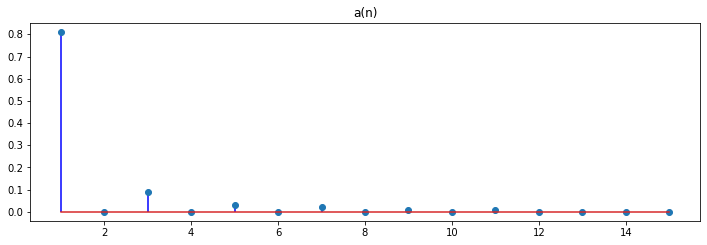

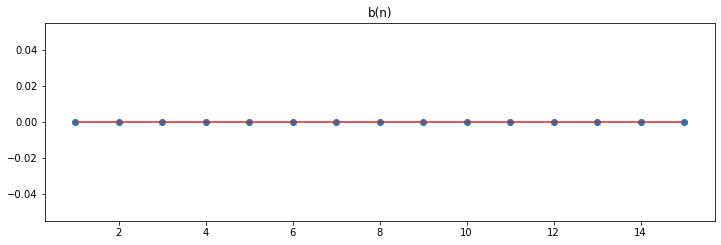

In [4]:
# 2(a)
T=2 #time perid of the function
w=2*np.pi/T 
def a(n): #making  function for fourier coefficient a(n)
    if (-1<=x<=1):
    f= lambda x:(1-2*abs(x))*np.cos(n*w*x)  
    k= integrate.quad(f,-1, 1)

    return round(k[0],2)
def b(n): #making  function for fourier coefficient b(n)
    if (-1<=x<=1) 
    f = lambda x:(1-2*abs(x))*np.sin(n*w*x) 
    k= integrate.quad(f,-1, 1)
    return round(k[0],2)
n=np.arange(1,16,1)

plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
a_sa=[abs(a(i)) for i in n] #for plotting absolute values of coeffecient a(n)
plt.title('a(n)')
plt.stem(n,a_sa,'b')

plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
b_sa=np.abs([b(i) for i in n])#for plotting absolute values of coeffecient b(n)
plt.title('b(n)')
plt.stem(n,b_sa,'r')
plt.show()



# 2(b)

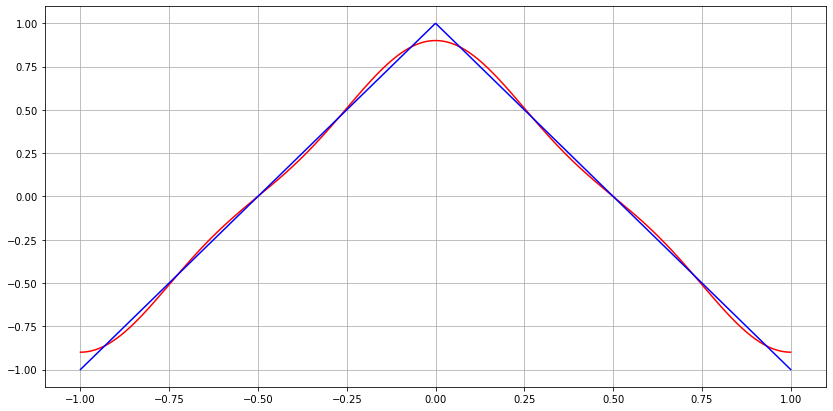

In [8]:
#2(b)
f=lambda x:(1-2*abs(x)) # plotting the origional signal
t=np.linspace(-1,1,1000)
y=np.zeros([len(t)])
for n in range(1,4):
    y=y+a(n)*np.cos(n*w*t)+b(n)*np.sin(n*w*t) #resultant function for n=3
plt.figure(figsize=(14,7))
plt.plot(t,y,'r')
F=[f(i) for i  in t]
plt.plot(t,F,'b')
plt.grid()
        
    
    

# 2(c)

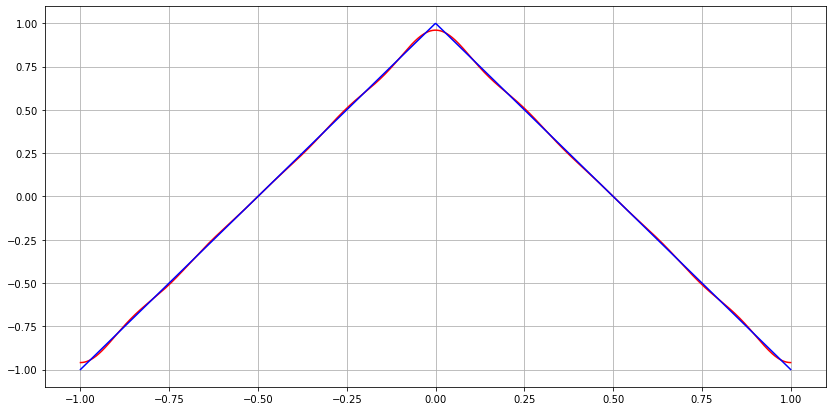

In [7]:
# 2(c)

t=np.linspace(-1,1,1000)
y=np.zeros([len(t)])
for n in range(1,10):
    y=y+a(n)*np.cos(n*w*t)+b(n)*np.sin(n*w*t) #making function for n=9 
plt.figure(figsize=(12,8))
plt.plot(t,y,'r')
F=[f(i) for i  in t]
plt.plot(t,F,'b')
plt.grid()

Observation:- As we increasing the value of n for partial sum, the approximated function is getting closer to the actual function.

# Question 3

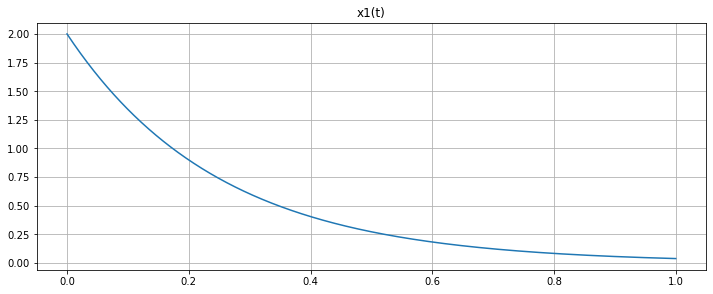

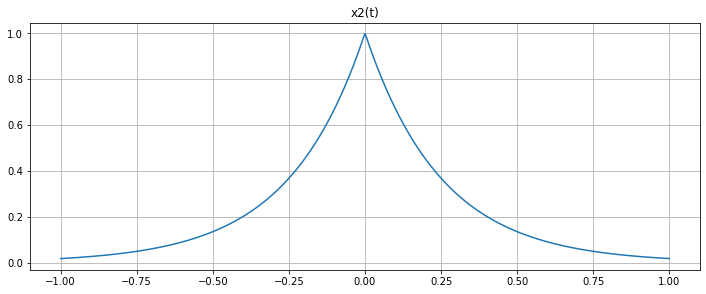

In [34]:
# plotting x1(t)
a=4
A=2
t=np.linspace(0,1,1000) # t range
x1=(np.exp(-a*t))*A  #y=Ae^(-a*x)

plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
plt.plot(t,x1)
plt.title('x1(t)')
plt.grid()
#plotting x2(t) 
t1=np.linspace(-1,1,1000)

t_1=-a*(abs(t1)) 
y=np.exp(t_1) #y=Ae^(-a*|x|)

plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
plt.plot(t1,y)
plt.title('x2(t)')
plt.grid()

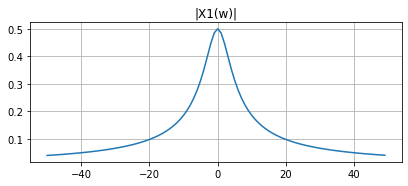

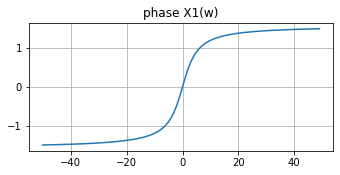

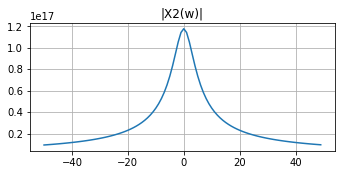

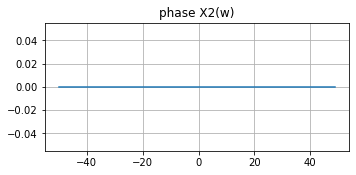

In [11]:
# x(w)=integration of Ae^(-kt)*e^-jwt 
#finding real and imaginary part 
X1_real = np.array([integrate.quad(lambda t,w : 2*np.exp(-4*t)*np.cos(w*t),0,10,args=w)[0] for w in range(-50,50)])
X1_img = np.array([integrate.quad(lambda t,w : 2*np.exp(-4*t)*np.sin(w*t),0,10,args=w)[0] for w in range(-50,50)])
# for Ae^(-|k|*t)
X2_real = np.array([integrate.quad(lambda t : 2*np.exp(4*abs(t))*np.cos(w*t),0,10)[0] for w in range(-50,50)])
X2_img = np.array([integrate.quad(lambda t : 2*np.exp(4*abs(t))*np.sin(w*t),0,10)[0] for w in range(-50,50)])

X1_mag = np.sqrt(X1_real**2 + X1_img**2)#for finding absolute value 
X2_mag = np.sqrt(X2_real**2 + X2_img**2)

X1_phase = np.arctan(X1_img/X1_real)#for finding the phase
X2_phase = np.arctan(X2_img/X2_real)

w = [i for i in range(-50,50)]
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.tight_layout(pad=3)
plt.plot(w,X1_mag)
plt.title("|X1(w)|")
plt.grid()

plt.figure(figsize=(12,8))
plt.subplot(3,2,2)
plt.plot(w,X1_phase)
plt.title("phase X1(w)")
plt.grid()

plt.figure(figsize=(12,8))
plt.subplot(3,2,3)
plt.plot(w,X2_mag)
plt.title("|X2(w)|")
plt.grid()

plt.figure(figsize=(12,8))
plt.subplot(3,2,4)
plt.plot(w,X2_phase)
plt.title("phase X2(w)")
plt.grid()

# Question 4

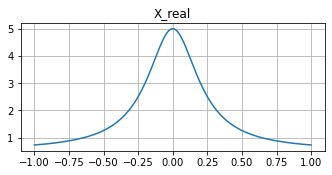

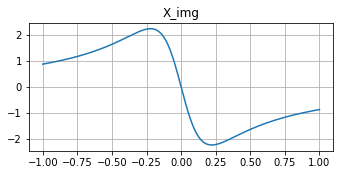

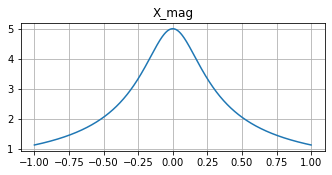

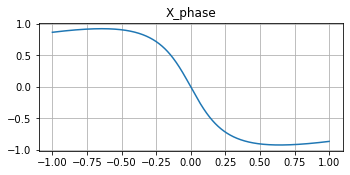

In [9]:

def function(a,w): #Defining function for fourier transform
    fn = 1 - (a*np.exp(-1j*w))
    return 1/fn

a = 0.8
w = np.linspace(-1,1,1000)
x = function(a,w)

real_x = x.real #finding real value of it 
imag_x = x.imag  #for finding imaginary value
mag_x = np.absolute(x)
phase_x = np.angle(x)#for finding angle

plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(w,real_x)
plt.title("X_real")
plt.grid()

plt.figure(figsize=(12, 8))
plt.subplot(3,2,2)
plt.plot(w,imag_x)
plt.title("X_img")
plt.grid()

plt.figure(figsize=(12, 8))
plt.subplot(3,2,3)
plt.plot(w,mag_x)
plt.title("X_mag")
plt.grid()

plt.figure(figsize=(12, 8))
plt.subplot(3,2,4)
plt.plot(w,phase_x)
plt.title("X_phase")
plt.grid()


# Question 5

C:\Users\sakshi\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


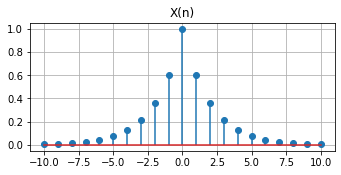

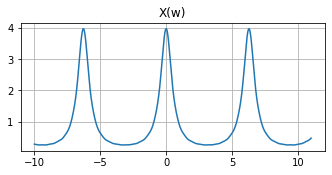

In [10]:
n= np.arange(-10,11,1)

#function for X(n)
def Xn(a,n):
    return a**(abs(n))
X=Xn(0.6,n)
plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.stem(n,X)
plt.title("X(n)")
plt.grid()

#function for X(w)
def f_t(w): #function for fourier transform
    d = 0
    for i in range(-10,11):
        d += Xn(0.6,i)*np.exp(-1j*w*i)
    return d

w = np.linspace(-10,11,2000)
x_w = [f_t(i) for i in w]

plt.figure(figsize=(12, 8))
plt.subplot(3,2,2)
plt.plot(w,x_w)
plt.title("X(w)")
plt.grid()



# Question 6(a)

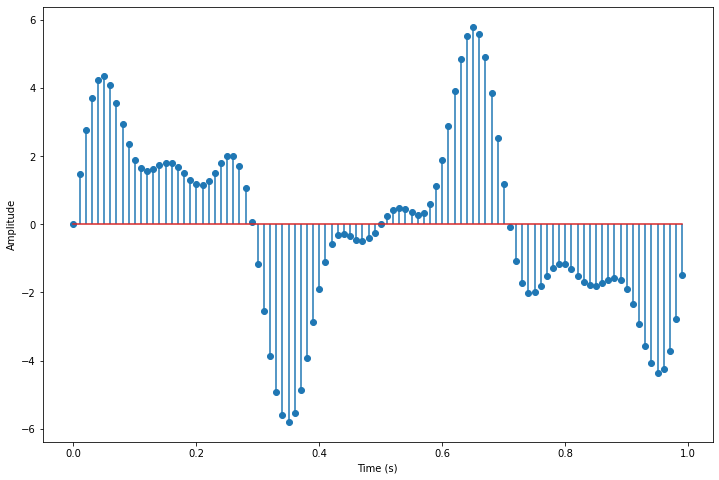

In [13]:
sr = 100.0 # sampling rate
ts = 1.0/sr # sampling interval
n = np.arange(0,1,ts)

freq1 = 2  # frequency of the signal 
y1 = 3*np.sin(2*np.pi*freq1*n) #signal defination



freq2 = 5   
y2= 2*np.sin(2*np.pi*freq2*n)

freq3 = 8   
y3 = np.sin(2*np.pi*freq3*n)
y=y1+y2+y3

plt.figure(figsize=(12,8))
plt.stem(n, y)
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

# 6(b)

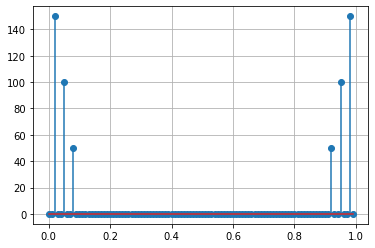

In [14]:

t=np.arange(0,1,.01)
def DFT(y): #defining DFT function
    N = len(y)
    a1 = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft += y[n]*np.exp(-2j*np.pi*k*n/N)
        a1.append(dft)
    return a1

x = DFT(y) #function calling
abs_x = np.absolute(x)
plt.stem(t,abs_x)
plt.grid()

# 6(c)

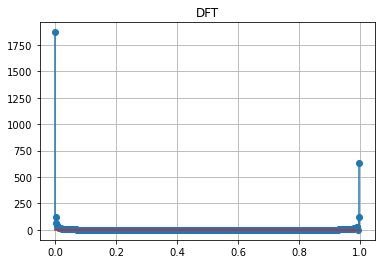

In [16]:
def DFT(y): #defining DFT function
    N = len(y)
    a1 = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft += y[n]*np.exp(-2j*np.pi*k*n/N)
        a1.append(dft)
    return a1

x = DFT(y) #function calling
plt.stem(t1,y1)
plt.title('DFT')
plt.grid()

            

# Question 7(a)

Text(0, 0.5, 'Amplitude')

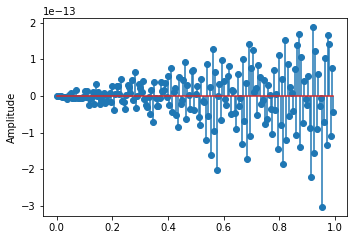

In [17]:
# sampling rate
sr = 200.0
# sampling interval
ts = 1.0/sr
n = np.arange(0,1,ts)

freq1 = 100   
y = 3*np.sin(2*np.pi*freq1*n) #function for sin wave using sampling theorem

plt.figure(figsize = (12, 8))
plt.subplot(221)
plt.stem(n,y) 
plt.ylabel('Amplitude')

# 7(b)

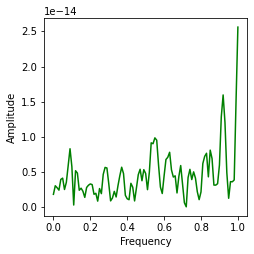

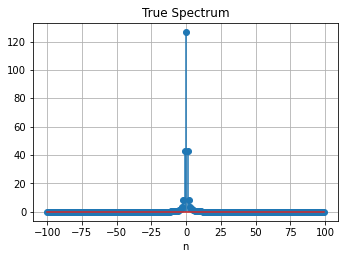

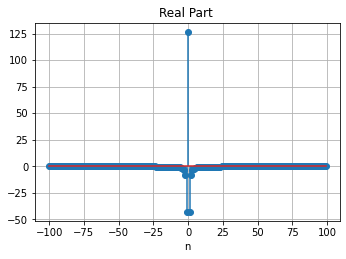

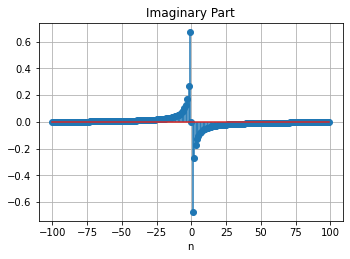

In [12]:
# sampling rate
sr = 200.0
# sampling interval
ts = 1.0/sr
n_1 = np.arange(0,1,ts)

freq1 = 100   
y = 3*np.sin(2*np.pi*freq1*n_1)

plt.figure(figsize = (8, 8))
plt.subplot(221)
plt.magnitude_spectrum(y, color ='green') #plotting spectrum of function
plt.ylabel('Amplitude')



# plotting of true spectrum by writting the functions for fft
def sine(a,f,n,fs):
    fn = a*np.sin(2*np.pi*f*n/fs)
    return fn



n1 = np.arange(-100,100,1)
a = 1
f = 100
fs = 200
n = np.linspace(0,fs,200)

s = sine(a,f,n,fs)
true_spectrum = DFT(s)

plt.figure(figsize = (12, 8))
plt.subplot(222)      
plt.stem(n1,np.abs(true_spectrum))
plt.xlabel('n')
plt.title('True Spectrum')
plt.grid()

plt.figure(figsize = (12, 8))
plt.subplot(223)
plt.stem(n1,np.array(true_spectrum).real)
plt.xlabel('n')
plt.title('Real Part ')
plt.grid()

plt.figure(figsize = (12, 8))
plt.subplot(224)
plt.stem(n1,np.array(true_spectrum).imag)
plt.xlabel('n')
plt.title('Imaginary Part')
plt.grid()

# 7(c)

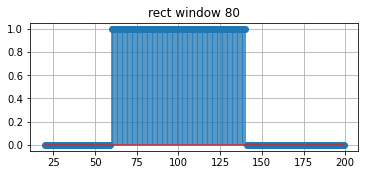

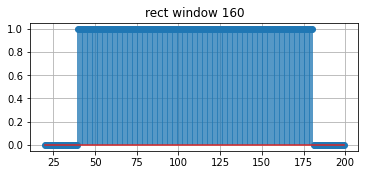

In [16]:
#rectangular window function
n=np.arange(20,200,1)
x=np.zeros(len(n))
def rect(n,T):
    for i in range(len(n)):
        if i>=T and i<=120: # rect signal defination
            x[i]=1
        else:
            x[i]=0
    return x
r = rect(n,40)
plt.figure(figsize=(20,8))
plt.subplot(3,3,4)
plt.stem(n,r) # plotting discrete function of n vs r
plt.title('rect window 80')
plt.grid()

def rect1(n,T1):
    for i in range(len(n)):
        if i>=T1 and i<=160: # rect signal defination
            x[i]=1
        else:
            x[i]=0
    return x
r1 = rect1(n,20)
plt.figure(figsize=(20,8))
plt.subplot(3,3,5)
plt.stem(n,r1) # plotting discrete function of n vs r
plt.title('rect window 160')
plt.grid()


# 7(f)

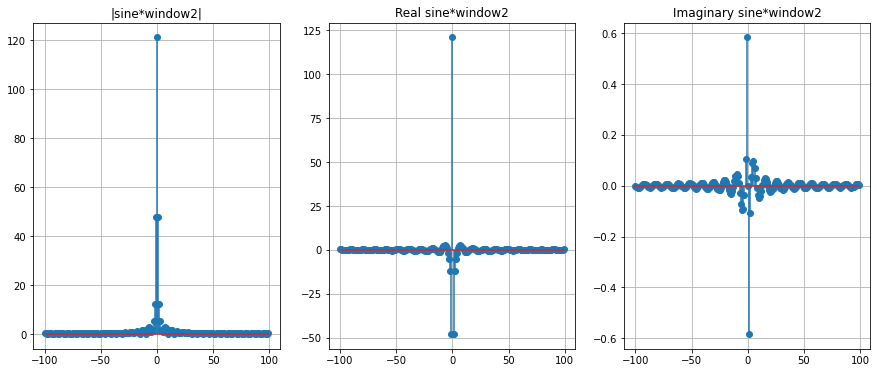

In [18]:
def window_seq(a,n,T): #making window function
    rect =[]
    for sample in n:
        if sample < -T/2:
            rect.append(0)
        elif sample > T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect
T = 160
w2 = window_seq(a,n1,T)

v=s*w2
       
plt.stem(n1,np.abs(DFT(v))) 
plt.title("|sine*window2|")
plt.grid()
plt.stem(n1,(np.real(DFT(v)))) 
plt.title("Real sine*window2")
plt.grid()
plt.stem(n1,(np.imag(DFT(v)))) 
plt.title("Imaginary sine*window2")
plt.grid()

